In [1]:
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix , ConfusionMatrixDisplay
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D, BatchNormalization, Conv2D
from tensorflow.keras.layers import GlobalAveragePooling2D,Reshape,Multiply
from tensorflow.keras.layers import ActivityRegularization,GaussianDropout,SpatialDropout2D,Dropout
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense,Input,Flatten
from tensorflow.keras.layers import concatenate,Add
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pickle as pkl
import pandas as pd

<h1>Load Images and dataset</h1>

In [2]:
age_df = pd.read_csv('../../Assignment 2/Ages.csv')
identity_emotion_df = pd.read_csv('../../Assignment 1/task1/Data.csv')

In [58]:
identity_emotion_df.dtypes

Path                 object
Identity             object
Facial Expression     int64
age                   int64
dtype: object

In [66]:
identity_emotion_df['Identity'] = identity_emotion_df['Identity'].map(lambda x: 1 if x == 'haziq' else 0)

In [38]:
with open('../Data/Compressed_data_custom_224x224','rb') as file:
    identity_emotion_images = pkl.load(file)
identity_emotion_images.shape

(61, 224, 224, 3)

In [36]:
identity_emotion_df

,Path,Identity,Facial Expression,age
0,../data/sulaiman_0 (31).jpeg,sulaiman,0,26
1,../data/sulaiman_1 (37).jpeg,sulaiman,1,26
2,../data/haziq_0 (35).jpeg,haziq,0,21
3,../data/haziq_0 (31).jpeg,haziq,0,21
4,../data/haziq_0 (45).jpeg,haziq,0,21
...,...,...,...,...
56,../data/sulaiman_1 (30).jpeg,sulaiman,1,26
57,../data/sulaiman_1 (34).jpeg,sulaiman,1,26
58,../data/haziq_1 (13).jpeg,haziq,1,21
59,../data/sulaiman_1 (28).jpeg,sulaiman,1,26


In [48]:
identity_emotion_df.iloc[:,[1,2]].values

array([['sulaiman', 0],
       ['sulaiman', 1],
       ['haziq', 0],
       ['haziq', 0],
       ['haziq', 0],
       ['haziq', 0],
       ['sulaiman', 0],
       ['haziq', 1],
       ['haziq', 0],
       ['sulaiman', 0],
       ['haziq', 0],
       ['haziq', 1],
       ['sulaiman', 1],
       ['sulaiman', 0],
       ['haziq', 1],
       ['haziq', 0],
       ['sulaiman', 0],
       ['haziq', 1],
       ['haziq', 1],
       ['sulaiman', 0],
       ['sulaiman', 1],
       ['haziq', 1],
       ['haziq', 0],
       ['sulaiman', 0],
       ['sulaiman', 1],
       ['haziq', 0],
       ['sulaiman', 1],
       ['sulaiman', 1],
       ['haziq', 0],
       ['sulaiman', 1],
       ['sulaiman', 0],
       ['sulaiman', 0],
       ['haziq', 0],
       ['sulaiman', 0],
       ['sulaiman', 1],
       ['haziq', 1],
       ['haziq', 1],
       ['sulaiman', 0],
       ['haziq', 1],
       ['haziq', 0],
       ['sulaiman', 0],
       ['sulaiman', 1],
       ['haziq', 0],
       ['haziq', 0],
       ['hazi

In [67]:
# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    identity_emotion_images,
    identity_emotion_df.iloc[:, [1, 2]].values,
    test_size=0.2,
    random_state=42
)

# Further split the training set into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images,
    train_labels,
    test_size=0.1,
    random_state=42
)

In [68]:
train_images.shape,val_images.shape,test_images.shape

((43, 224, 224, 3), (5, 224, 224, 3), (13, 224, 224, 3))

In [7]:
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.25)

In [5]:
# # Create separate data generators for training, validation, and testing For UTKF dataset
# train_generator = datagen.flow_from_dataframe(
#     dataframe=train_df,
#     directory='../../Assignment 2/UTKFace',
#     x_col='Path',
#     y_col='Age',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='raw'
# )

# val_generator = datagen.flow_from_dataframe(
#     dataframe=val_df,
#     directory='../../Assignment 2/UTKFace',
#     x_col='Path',
#     y_col='Age',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='raw'
# )

# test_generator = datagen.flow_from_dataframe(
#     dataframe=test_df,
#     directory='../../Assignment 2/UTKFace',
#     x_col='Path',
#     y_col='Age',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='raw',
#     shuffle=False
# )


Found 17069 validated image filenames.
Found 1897 validated image filenames.
Found 4742 validated image filenames.


In [12]:
# # Create separate data generators for training, validation, and testing For custom dataset
# train_generator = datagen.flow_from_dataframe(
#     dataframe=train_df,
#     directory='../../Assignment 1/data',
#     x_col='Path',
#     y_col='identity',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='raw',
# )

# val_generator = datagen.flow_from_dataframe(
#     dataframe=val_df,
#     directory='../../Assignment 1/data',
#     x_col='Path',
#     y_col='Identity',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='raw',
# )

# test_generator = datagen.flow_from_dataframe(
#     dataframe=test_df,
#     directory='../../Assignment 1/data',
#     x_col='Path',
#     y_col='Identity',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='raw',
#     shuffle=False,
# )


Found 43 validated image filenames.
Found 5 validated image filenames.
Found 13 validated image filenames.


In [6]:
# identity_emotion_file = '../Data/Compressed_data_custom_224x224'
# age_file = '../Data/Compressed_data_age_224x224'

In [7]:
# with open(identity_emotion_file, 'rb') as handle:
#     identity_emotion_images = pkl.load(handle)
# print(identity_emotion_images.shape)
# with open(age_file, 'rb') as handle:
#     age_images = pkl.load(handle)
# print(age_images.shape)

<h1>Model Architecture</h1>

In [13]:
def Module_1(filters,previous_layer,kernel=(3,3)):
    x = Conv2D(filters,kernel_size=kernel,padding='same',activation='relu')(previous_layer)
    x = Conv2D(filters,kernel_size=kernel,padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    # x = ActivityRegularization(l2=0.00001)(x)
    x = MaxPooling2D((2,2),strides=2,padding='same')(x)
    return x

In [14]:
def Module_2(filters,previous_layer,kernel=(3,3)):
    x = Conv2D(filters,kernel_size=kernel,padding='same',activation='relu')(previous_layer)
    x = BatchNormalization()(x)
    # x = Dropout(0.1)(x)
    return x

In [15]:
def Module_3(filters,previous_layer):
    x = Conv2D(filters,kernel_size=(3,3),padding='same',activation='relu')(previous_layer)
    x = BatchNormalization()(x)
    x = ActivityRegularization(l2=0.0001)(x)
    return x

In [16]:
def Module_4(filters,previous_layer):
    x = GlobalAveragePooling2D()(previous_layer)
    x = Reshape((1, 1, filters))(x)
    x = Conv2D(28,kernel_size=(3,3),padding='same',activation='relu')(x)
    x = Conv2D(filters,kernel_size=(3,3),padding='same',activation='relu')(x)
    x = Multiply()([previous_layer,previous_layer])
    x = Module_3(112,x)
    return x

In [12]:
def load_model_age(input_shape=(224,224,3),lr=0.001,classes=10):
    # Model val_accuracy= 74%
    input_layer = Input(shape = input_shape,name='Input_layer')
    x = Module_1(filters=32,previous_layer=input_layer)
    x = MaxPooling2D((2,2),strides=2,padding='same')(x)
    x1 = Module_2(filters=64,previous_layer=x)
    x1 = Module_2(filters=64,previous_layer=x1,kernel=(3,3))
    x1 = Module_2(filters=32,previous_layer=x1,kernel=(3,3))
    x = Add()([x,x1])
    x = Module_2(filters=64,previous_layer=x)
    x1 = Module_2(filters=32,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=64,previous_layer=x1,kernel=(3,3))
    x = Add()([x,x1])
    x = MaxPooling2D((2,2),strides=2,padding='same')(x)
    x = Module_2(filters=64,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=32,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=64,previous_layer=x1,kernel=(3,3))
    x = Module_2(filters=112,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=64,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=112,previous_layer=x1,kernel=(3,3))
    x = Add()([x,x1])
    x = MaxPooling2D((2,2),strides=2,padding='same')(x)
    x = Module_2(filters=112,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=64,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=112,previous_layer=x1,kernel=(3,3))
    x = Add()([x,x1])
    x = Module_4(filters=112,previous_layer=x)
    x = Add()([x,x1])
    x = Module_2(filters=300,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=82,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=300,previous_layer=x1,kernel=(3,3))
    x = Add()([x,x1])
    x = Module_2(filters=672,previous_layer=x,kernel=(3,3))
    x = Module_4(filters=672,previous_layer=x)
    x = Flatten()(x)
    x = Dense(128,activation='relu')(x)
    x = Dense(64,activation='relu')(x)
    x = Dense(32,activation='relu')(x)    
    x = Dropout(0.4)(x)
    x = Dense(16,activation='relu')(x)

    output = Dense(classes,activation='relu')(x)
    model = Model(inputs=input_layer,outputs=output) 
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mean_squared_error',metrics=['mae'])
    return model
    

In [59]:
def load_model_identity_emotion(input_shape=(224,224,3),lr=0.001,classes=10):
    # Model val_accuracy= 74%
    input_layer = Input(shape = input_shape,name='Input_layer')
    x = Module_1(filters=32,previous_layer=input_layer)
    x = MaxPooling2D((2,2),strides=2,padding='same')(x)
    x1 = Module_2(filters=64,previous_layer=x)
    x1 = Module_2(filters=64,previous_layer=x1,kernel=(3,3))
    x1 = Module_2(filters=32,previous_layer=x1,kernel=(3,3))
    x = Add()([x,x1])
    x = Module_2(filters=64,previous_layer=x)
    x1 = Module_2(filters=32,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=64,previous_layer=x1,kernel=(3,3))
    x = Add()([x,x1])
    x = MaxPooling2D((2,2),strides=2,padding='same')(x)
    x = Module_2(filters=64,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=32,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=64,previous_layer=x1,kernel=(3,3))
    x = Module_2(filters=112,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=64,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=112,previous_layer=x1,kernel=(3,3))
    x = Add()([x,x1])
    x = MaxPooling2D((2,2),strides=2,padding='same')(x)
    x = Module_2(filters=112,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=64,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=112,previous_layer=x1,kernel=(3,3))
    x = Add()([x,x1])
    x = Module_4(filters=112,previous_layer=x)
    x = Add()([x,x1])
    x = Module_2(filters=300,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=82,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=300,previous_layer=x1,kernel=(3,3))
    x = Add()([x,x1])
    x = Module_2(filters=672,previous_layer=x,kernel=(3,3))
    x = Module_4(filters=672,previous_layer=x)
    x = Flatten()(x)
    # Identity
    identity = Dense(128,activation='relu')(x)
    identity = Dense(64,activation='relu')(identity)
    identity = Dense(32,activation='relu')(identity)    
    identity = Dropout(0.4)(identity)
    identity = Dense(16,activation='relu')(identity)
    identity_output = Dense(1,activation='sigmoid')(identity)
    
    # emotion
    emotion = Dense(128,activation='relu')(x)
    emotion = Dense(64,activation='relu')(emotion)
    emotion = Dense(32,activation='relu')(emotion)    
    emotion = Dropout(0.4)(emotion)
    emotion = Dense(16,activation='relu')(emotion)
    emotion_output = Dense(1,activation='sigmoid')(emotion)
    
    model = Model(inputs=input_layer,outputs=[identity_output,emotion_output]) 
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy',metrics=['accuracy'])
    return model
    

In [69]:
# age_model = load_model_age(lr=0.0001,classes=1)
identity_emotion_model = load_model_identity_emotion(lr=0.0001,classes=1)

In [70]:
identity_emotion_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_layer (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_216 (Conv2D)            (None, 224, 224, 32  896         ['Input_layer[0][0]']            
                                )                                                                 
                                                                                                  
 conv2d_217 (Conv2D)            (None, 224, 224, 32  9248        ['conv2d_216[0][0]']             
                                )                                                           

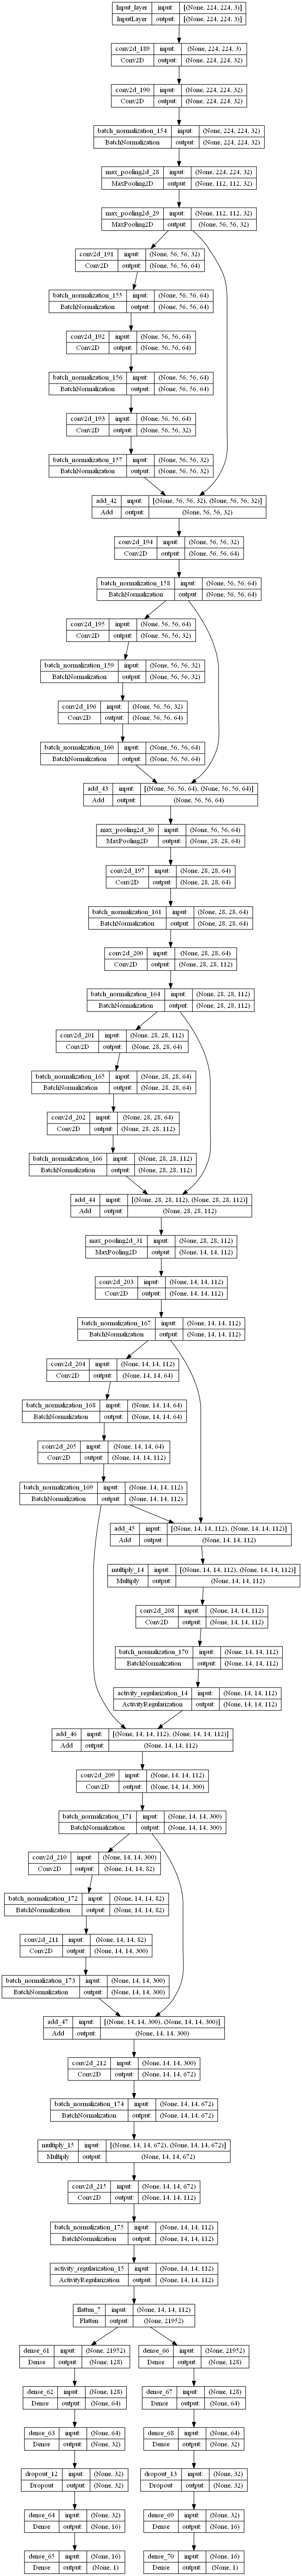

In [62]:
plot_model(identity_emotion_model,show_shapes=True, show_layer_names=True)

<h1>Train models</h1>

In [71]:
model_name = 'identity_emotion'

In [72]:
# Define the checkpoint path and early stopping
checkpoint_path = f"model_checkpoint_class_{model_name}.h5"
checkpoint = ModelCheckpoint(checkpoint_path, save_best_only=True,monitor='val_loss',mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
# Loads the weights
# model.load_weights(checkpoint_path)

In [19]:
# history = age_model.fit(
#     train_generator,
#     epochs=100,
#     steps_per_epoch=len(train_generator),
#     validation_data=val_generator,
#     validation_steps=len(val_generator),
#     verbose=1,
#     callbacks=[checkpoint,early_stopping])

Epoch 1/100
534/534 [==============================] - 90s 147ms/step - loss: 311.1601 - mae: 12.8571 - val_loss: 281.1912 - val_mae: 12.1226
Epoch 2/100
534/534 [==============================] - 76s 141ms/step - loss: 187.4759 - mae: 9.9083 - val_loss: 232.3393 - val_mae: 10.9301
Epoch 3/100
534/534 [==============================] - 76s 141ms/step - loss: 152.6967 - mae: 8.8786 - val_loss: 158.9721 - val_mae: 8.8588
Epoch 4/100
534/534 [==============================] - 75s 140ms/step - loss: 125.3139 - mae: 7.9636 - val_loss: 277.4228 - val_mae: 12.0879
Epoch 5/100
534/534 [==============================] - 75s 140ms/step - loss: 105.9358 - mae: 7.2926 - val_loss: 168.9160 - val_mae: 9.4599
Epoch 6/100
534/534 [==============================] - 75s 140ms/step - loss: 87.5901 - mae: 6.6256 - val_loss: 225.1807 - val_mae: 11.1325
Epoch 7/100
534/534 [==============================] - 75s 141ms/step - loss: 73.9179 - mae: 6.0662 - val_loss: 300.1279 - val_mae: 13.3097
Epoch 8/100
534/

In [77]:
history = identity_emotion_model.fit(
    train_images,
    [train_labels[:, 0], train_labels[:, 1]],
    epochs=100,
    validation_data=(val_images, [val_labels[:, 0], val_labels[:, 1]]),
    verbose=1,
    callbacks=[checkpoint, early_stopping]
)


Epoch 1/100
2/2 [==============================] - 2s 1s/step - loss: 5.3236 - dense_75_loss: 0.4139 - dense_80_loss: 0.5248 - dense_75_accuracy: 0.8605 - dense_80_accuracy: 0.8140 - val_loss: 106.3867 - val_dense_75_loss: 0.9182 - val_dense_80_loss: 0.8986 - val_dense_75_accuracy: 0.6000 - val_dense_80_accuracy: 0.6000
Epoch 2/100
2/2 [==============================] - 1s 1s/step - loss: 5.2957 - dense_75_loss: 0.3834 - dense_80_loss: 0.5291 - dense_75_accuracy: 0.8837 - dense_80_accuracy: 0.7907 - val_loss: 34.6101 - val_dense_75_loss: 0.7284 - val_dense_80_loss: 0.8585 - val_dense_75_accuracy: 0.6000 - val_dense_80_accuracy: 0.4000
Epoch 3/100
2/2 [==============================] - 1s 892ms/step - loss: 5.2327 - dense_75_loss: 0.3888 - dense_80_loss: 0.4623 - dense_75_accuracy: 0.8372 - dense_80_accuracy: 0.8372 - val_loss: 15.6710 - val_dense_75_loss: 0.6972 - val_dense_80_loss: 0.8640 - val_dense_75_accuracy: 0.4000 - val_dense_80_accuracy: 0.4000
Epoch 4/100
2/2 [================

In [78]:
# age_model.load_weights(checkpoint_path)

In [79]:
def plot_history(history,metrics):
    plt.plot(history.history[metrics])
    plt.plot(history.history['val_'+metrics])
    plt.title(f'model {metrics}')
    plt.ylabel(f'{metrics}') 
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

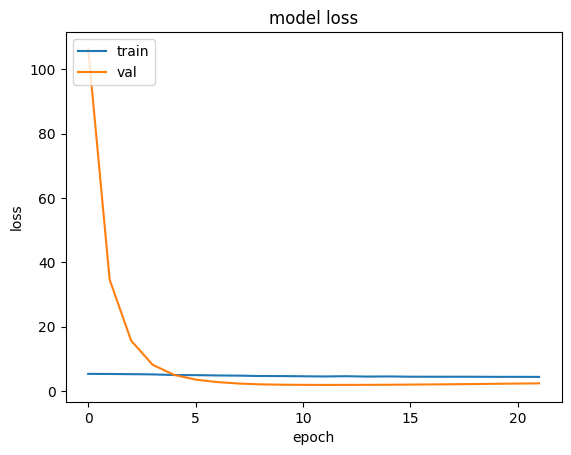

In [80]:
plot_history(history,metrics='loss')

In [82]:
# plot_history(history,metrics='mae')

KeyError: 'accuracy'

In [83]:
y_pred = age_model.predict(test_generator,steps=len(test_generator))

1/1 [==============================] - 2s 2s/step


In [84]:
y_pred

[array([[0.72819173],
        [0.77312255],
        [0.73150575],
        [0.729469  ],
        [0.72936255],
        [0.75883543],
        [0.7290026 ],
        [0.72805595],
        [0.729026  ],
        [0.7273999 ],
        [0.72911733],
        [0.728891  ],
        [0.7291455 ]], dtype=float32),
 array([[0.27991363],
        [0.2968617 ],
        [0.28474802],
        [0.2788344 ],
        [0.27881068],
        [0.29339692],
        [0.27899817],
        [0.2795606 ],
        [0.27921057],
        [0.27969337],
        [0.2791709 ],
        [0.27931052],
        [0.27855784]], dtype=float32)]

In [26]:
test_generator.labels

array([49, 17, 17, ..., 20, 53,  4], dtype=int64)

In [27]:
# Calculate R2 score
r2 = r2_score(test_generator.labels, y_pred)

# Print the R2 score
print("R2 Score:", r2)

R2 Score: 0.6025206425010587


In [29]:
age_model.save(f'./Models/{model_name}.h5')

<h2>Identity_emotion</h2>

In [ ]:
def load_model_identity_emotion(input_shape=(224,224,3),lr=0.001,classes=10):
    # Model val_accuracy= 74%
    input_layer = Input(shape = input_shape,name='Input_layer')
    x = Module_1(filters=32,previous_layer=input_layer)
    x = MaxPooling2D((2,2),strides=2,padding='same')(x)
    x1 = Module_2(filters=64,previous_layer=x)
    x1 = Module_2(filters=64,previous_layer=x1,kernel=(3,3))
    x1 = Module_2(filters=32,previous_layer=x1,kernel=(3,3))
    x = Add()([x,x1])
    x = Module_2(filters=64,previous_layer=x)
    x1 = Module_2(filters=32,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=64,previous_layer=x1,kernel=(3,3))
    x = Add()([x,x1])
    x = MaxPooling2D((2,2),strides=2,padding='same')(x)
    x = Module_2(filters=64,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=32,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=64,previous_layer=x1,kernel=(3,3))
    x = Module_2(filters=112,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=64,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=112,previous_layer=x1,kernel=(3,3))
    x = Add()([x,x1])
    x = MaxPooling2D((2,2),strides=2,padding='same')(x)
    x = Module_2(filters=112,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=64,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=112,previous_layer=x1,kernel=(3,3))
    x = Add()([x,x1])
    x = Module_4(filters=112,previous_layer=x)
    x = Add()([x,x1])
    x = Module_2(filters=300,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=82,previous_layer=x,kernel=(3,3))
    x1 = Module_2(filters=300,previous_layer=x1,kernel=(3,3))
    x = Add()([x,x1])
    x = Module_2(filters=672,previous_layer=x,kernel=(3,3))
    x = Module_4(filters=672,previous_layer=x)
    x = Flatten()(x)
    # Identity
    identity = Dense(128,activation='relu')(x)
    identity = Dense(64,activation='relu')(identity)
    identity = Dense(32,activation='relu')(identity)    
    identity = Dropout(0.4)(identity)
    identity = Dense(16,activation='relu')(identity)
    identity_output = Dense(1,activation='sigmoid')(identity)
    
    # emotion
    emotion = Dense(128,activation='relu')(x)
    emotion = Dense(64,activation='relu')(emotion)
    emotion = Dense(32,activation='relu')(emotion)    
    emotion = Dropout(0.4)(emotion)
    emotion = Dense(16,activation='relu')(emotion)
    emotion_output = Dense(1,activation='sigmoid')(emotion)
    
    model = Model(inputs=input_layer,outputs=[identity_output,emotion_output]) 
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy',metrics=['accuracy'])
    return model
    

In [ ]:
identity_emotion_model = load_model_identity_emotion(lr=0.0001,classes=1)

In [ ]:
identity_emotion_model.summary()

In [ ]:
plot_model(identity_emotion_model,show_shapes=True, show_layer_names=True)

In [ ]:
model_name = 'identity_emotion'

In [ ]:
# Define the checkpoint path and early stopping
checkpoint_path = f"model_checkpoint_class_{model_name}.h5"
checkpoint = ModelCheckpoint(checkpoint_path, save_best_only=True,monitor='val_loss',mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
# Loads the weights
# model.load_weights(checkpoint_path)

In [ ]:
history = identity_emotion_model.fit(
    train_images,
    [train_labels[:, 0], train_labels[:, 1]],
    epochs=100,
    validation_data=(val_images, [val_labels[:, 0], val_labels[:, 1]]),
    verbose=1,
    callbacks=[checkpoint, early_stopping]
)


In [ ]:
identity_emotion_model.load_weights(checkpoint_path)

In [ ]:
plot_history(history,metrics='loss')

In [ ]:
plot_history(history,metrics='accuracy')

In [85]:
y_pred = identity_emotion_model.predict(test_images)

1/1 [==============================] - 0s 48ms/step


In [91]:
threshold = 0.5  # Set the threshold value

# Convert probabilities to binary values using the threshold
y_pred_identity = np.where(y_pred[0] >= threshold, 1, 0)

In [93]:
print(f"Accuracy: {accuracy_score(test_labels[0], y_pred_identity)}")
print(f"Classwise Classification Report: \n{classification_report(test_labels[0], y_pred_identity)}")
con_matrix = confusion_matrix(np.ravel(test_labels[0]), y_pred_identity)
print("\nConfusion Matrix: ")
con_matrix = ConfusionMatrixDisplay(con_matrix)
con_matrix.plot()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [2, 13]

In [96]:
test_images.shape,test_labels.shape

((13, 224, 224, 3), (13, 2))